# LETS GROW MORE-DATA SCIENCE INTERN

# BEGINNER LEVEL TASK

# Task-1: Iris Classification

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
columns=['Sepal length in cm','Sepal width in cm','Petal length in cm','Petal width in cm','Class'] 
df= pd.read_csv('iris.data',names=columns)

In [ ]:
df.head()

,Sepal length in cm,Sepal width in cm,Petal length in cm,Petal width in cm,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sepal length in cm  150 non-null    float64
 1   Sepal width in cm   150 non-null    float64
 2   Petal length in cm  150 non-null    float64
 3   Petal width in cm   150 non-null    float64
 4   Class               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,Sepal length in cm,Sepal width in cm,Petal length in cm,Petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.shape

(150, 5)

In [ ]:
df.columns

Index(['Sepal length in cm', 'Sepal width in cm', 'Petal length in cm',
       'Petal width in cm', 'Class'],
      dtype='object')

In [ ]:
df.isnull().sum()

Sepal length in cm    0
Sepal width in cm     0
Petal length in cm    0
Petal width in cm     0
Class                 0
dtype: int64

<ipython-input-13-e2f9ec1bdc38>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

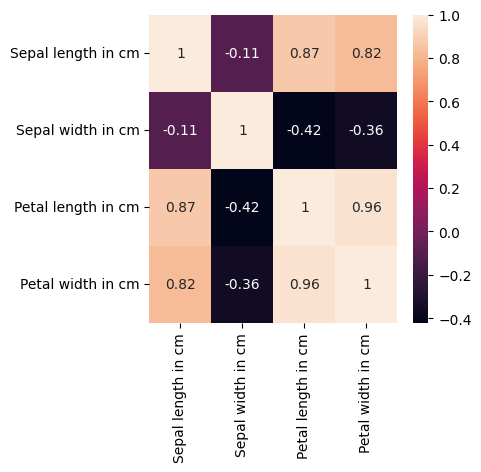

In [ ]:
plt.figure(figsize=(4,4))
sns.heatmap(df.corr(), annot=True)

In [ ]:
df['Class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

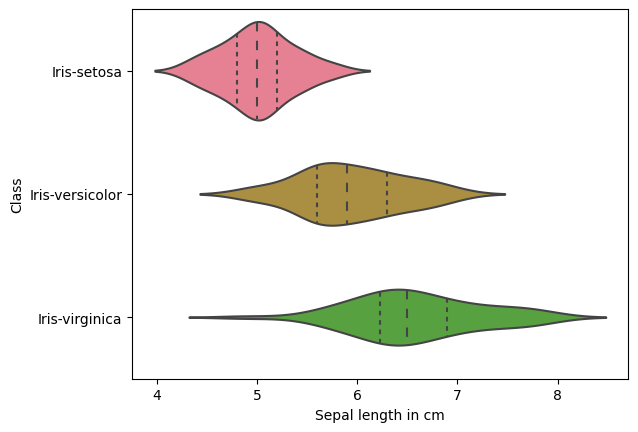

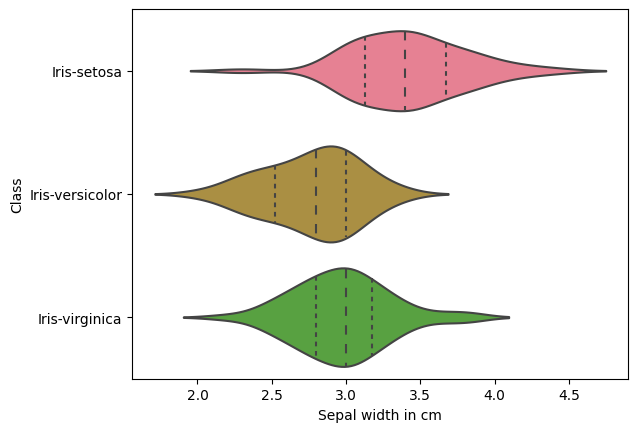

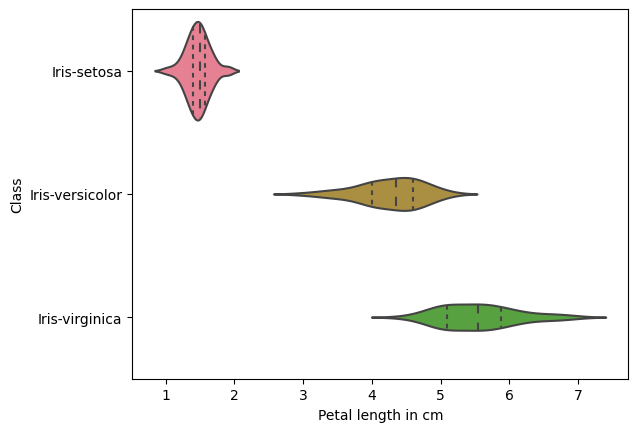

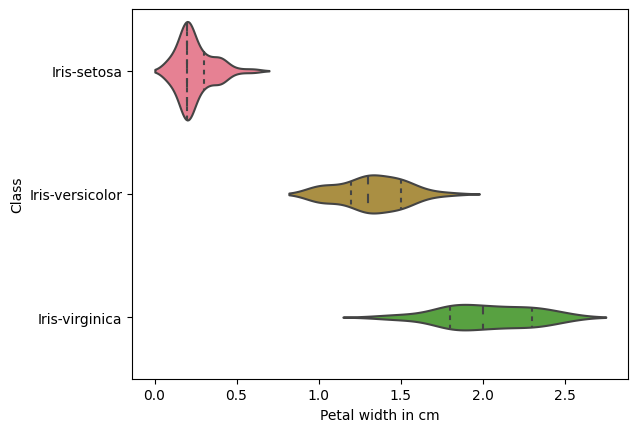

In [ ]:
sns.violinplot(y='Class',x='Sepal length in cm',data=df,inner='quartile')
plt.show()
sns.violinplot(y='Class',x='Sepal width in cm',data=df,inner='quartile')
plt.show()
sns.violinplot(y='Class',x='Petal length in cm',data=df, inner='quartile')
plt.show()
sns.violinplot(y='Class',x='Petal width in cm',data=df,inner='quartile')
plt.show()

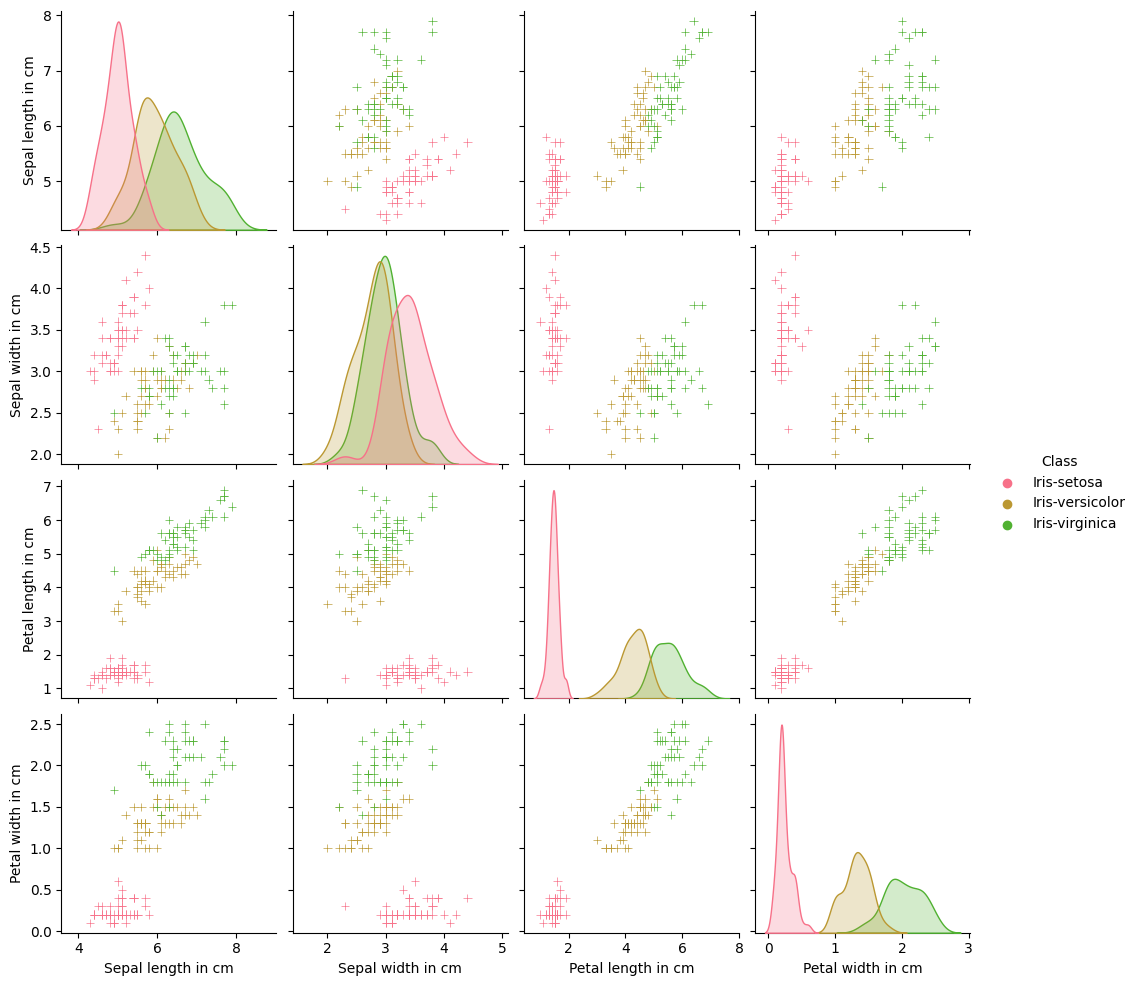

In [ ]:
sns.pairplot(df, hue='Class', markers='+')
plt.show()

In [ ]:
X = df.drop(['Class'],axis=1)
y = df['Class']
print(f'X shape:{X.shape}|y shape:{y.shape}')

X shape:(150, 4)|y shape:(150,)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.50,random_state=5)

In [ ]:
X_train.shape

(75, 4)

In [ ]:
X_test.shape

(75, 4)

In [ ]:
y_train.shape

(75,)

In [ ]:
y_test.shape

(75,)

In [ ]:
#evaluating the model
models = []
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVC',SVC(gamma='auto')))
results=[]
model_names=[]
for name,model in models:
    kfold=StratifiedKFold(n_splits=10,random_state=5,shuffle=True)
    cv_results=cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    model_names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.962500 (0.080039)
LDA: 0.975000 (0.050000)
KNN: 0.962500 (0.080039)
DT: 0.960714 (0.060187)
NB: 0.962500 (0.080039)
SVC: 0.975000 (0.075000)


In [ ]:
model = SVC(gamma='auto')
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(f'Test Accuracy: {accuracy_score(y_test, prediction)*100}')
print(f'Classification Report: \n {classification_report(y_test, prediction)}')

Test Accuracy: 97.33333333333334
Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       1.00      0.93      0.96        29
 Iris-virginica       0.92      1.00      0.96        24

       accuracy                           0.97        75
      macro avg       0.97      0.98      0.97        75
   weighted avg       0.98      0.97      0.97        75



In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(f'Test Accuracy: {accuracy_score(y_test, prediction)*100}')
print(f'Classification Report: \n {classification_report(y_test, prediction)}')

Test Accuracy: 97.33333333333334
Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       1.00      0.93      0.96        29
 Iris-virginica       0.92      1.00      0.96        24

       accuracy                           0.97        75
      macro avg       0.97      0.98      0.97        75
   weighted avg       0.98      0.97      0.97        75



In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(f'Test Accuracy: {accuracy_score(y_test, prediction)*100}')
print(f'Classification Report: \n {classification_report(y_test, prediction)}')

Test Accuracy: 96.0
Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       0.93      0.97      0.95        29
 Iris-virginica       0.96      0.92      0.94        24

       accuracy                           0.96        75
      macro avg       0.96      0.96      0.96        75
   weighted avg       0.96      0.96      0.96        75



In [ ]:
model =LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(f'Test Accuracy: {accuracy_score(y_test, prediction)*100}')
print(f'Classification Report: \n {classification_report(y_test, prediction)}')

Test Accuracy: 97.33333333333334
Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       0.97      0.97      0.97        29
 Iris-virginica       0.96      0.96      0.96        24

       accuracy                           0.97        75
      macro avg       0.97      0.97      0.97        75
   weighted avg       0.97      0.97      0.97        75



In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(f'Test Accuracy: {accuracy_score(y_test, prediction)*100}')
print(f'Classification Report: \n {classification_report(y_test, prediction)}')

Test Accuracy: 97.33333333333334
Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       1.00      0.93      0.96        29
 Iris-virginica       0.92      1.00      0.96        24

       accuracy                           0.97        75
      macro avg       0.97      0.98      0.97        75
   weighted avg       0.98      0.97      0.97        75



In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(f'Test Accuracy: {accuracy_score(y_test, prediction)*100}')
print(f'Classification Report: \n {classification_report(y_test, prediction)}')

Test Accuracy: 94.66666666666667
Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       0.96      0.90      0.93        29
 Iris-virginica       0.88      0.96      0.92        24

       accuracy                           0.95        75
      macro avg       0.95      0.95      0.95        75
   weighted avg       0.95      0.95      0.95        75



*`The best method for the Iris classification is the LogisticRegression,DesicionTree classifier and the SVC(support vector classifier) which gives the 97% of the accuracy of the predition.`*